<a href="https://www.kaggle.com/code/mcpenguin/rollercoaster-database-eda?scriptVersionId=143235227" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

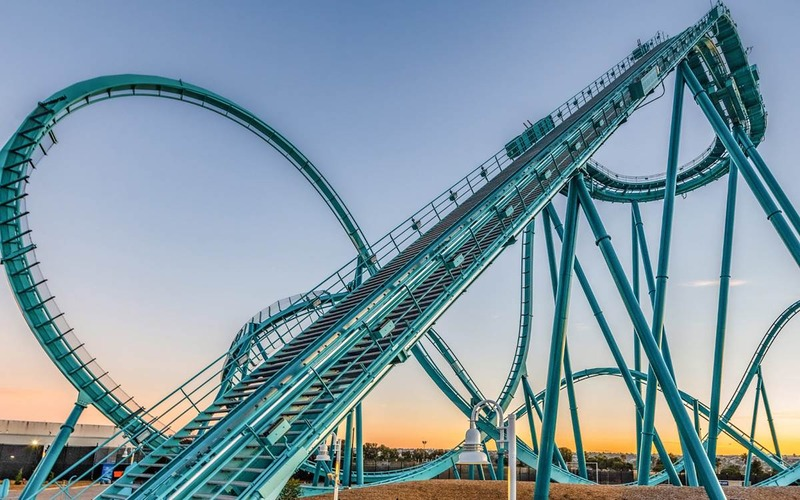

*Image source: Laughing Place*

# Rollercoaster Database: EDA

In this notebook, we will investigate the rollercoaster database and perform exploratory data analysis on it.

## Some of my other work

### Notebooks

- [Butterfly Image Classification](https://www.kaggle.com/code/mcpenguin/butterfly-classification-efficientnet-87)
- [Palmer Penguin EDA](https://www.kaggle.com/code/mcpenguin/palmer-archipelago-antarctica-penguin-eda)
- [Smoking and Drinking EDA + Classification](https://www.kaggle.com/code/mcpenguin/smoking-drinking-prediction-tfdf-71)
- [World Happiness Data Cleaning + EDA](https://www.kaggle.com/code/mcpenguin/world-happiness-data-cleaning-eda)
- [Precious Metals Stocks: EDA + Forecasting](https://www.kaggle.com/code/mcpenguin/precious-metals-stocks-eda-and-prediction)
- [Red Wine Quality EDA + Prediction](https://www.kaggle.com/code/mcpenguin/red-wine-quality-prediction)
- [Gaia Stellar Classification](https://www.kaggle.com/code/mcpenguin/gaia-stellar-classification-lightgbm-91-acc)

### Datasets

- [Malaysian Condominium Prices Data](https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data)
- [Malaysian COVID-19 Data](https://www.kaggle.com/datasets/mcpenguin/malaysia-covid19)
- [Super Mario 64 Speedruns](https://www.kaggle.com/datasets/mcpenguin/super-mario-64-speedruns)

# Import Libraries Needed

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', False)

# Load Dataset

In [ ]:
INPUT_DIR = "../input/rollercoasters"
df = pd.read_csv(os.path.join(INPUT_DIR, "data.csv"), thousands=',')

Let's see how the dataset looks like:

In [ ]:
df.head()

We can examine the shape of the dataset and the number of missing values by calling `info()`:

In [ ]:
df.info()

We see that the first few parameters contain no missing values. However, some of the later parameters contain many missing values. Some parameters, such as uphill/downhill length, contain mostly missing values.

# Exploratory Data Analysis

Before examining the individual variates, let us try to examine the model as a whole by getting a quick summary of the dataset's variates:

In [ ]:
df.describe(include=[np.number]).T

In [ ]:
df.describe(exclude=[np.number]).T

Another thing we could examine are the correlations between the different numeric explanatory variates:

In [ ]:
plt.figure(figsize=(15, 15))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

We see that the numerical variates of the rollercoaster display fairly strong positive correlations with each other. This should be intuitive, as these values tend to be larger with larger coasters, and smaller with smaller coasters.

Note some of the values in our correlation matrix may be inaccurate as there may only be a few observations with non-missing values of the variate.

## Amusement Park

From our previous analysis, we can see that there are over 4000 amusement parks. One possible analysis we can do is to make a histogram showing the distribution of the number of rollercoasters in each theme park.

Note that we **cannot** just group by the park name itself, since park names are not unique globally. Indeed, there is a Luna Park in Italy, but also a Luna Park in Armenia! Therefore, we have to group by both the park name and the location information - in particular, the city, region and country, to guarantee "uniqueness" of park names.

In [ ]:
df_amusement_park = pd.DataFrame(df.groupby(['Amusement Park', 'City', 'Region', 'Country']).count()['Name']).rename({"Name": "count"}, axis=1)
hp = sns.histplot(data=df_amusement_park, x='count', bins=40)
hp.set(xlabel='# of rollercoasters', title="Parks by # of Rollercoasters")
hp.set_yscale('log')
plt.show()

We can find the amusement parks that have the most rollercoasters in our dataset:

In [ ]:
df_sorted_amusement_park = df_amusement_park.sort_values(by='count', ascending=False)
df_sorted_amusement_park.head(10)

## Track Length

Let's examine the rollercoasters track lengths.

In [ ]:
hp = sns.histplot(data=df, x='Length (ft)', bins=40)
plt.show()

Similarly, we can examine the longest rollercoasters in the world:

In [ ]:
df_sorted_length = df.sort_values(by='Length (ft)', ascending=False)
df_sorted_length[['Name',  'Amusement Park', 'City', 'Country', 'Length (ft)']].head(20)

Another plot that we could do is to plot the rollercoasters' lengths vs. their heights.

In [ ]:
ax = sns.jointplot(data=df, y='Length (ft)', x="Height (ft)")
plt.show()

From this, we see that a rollercoaster's length seems to be correlated with their height, which makes sense intuitively as both values are larger for bigger rollercoasters, and vice versa. 

## Country

We can also investigate which countries have the most rollercoasters.

In [ ]:
df_country = pd.DataFrame(df.groupby(['Country']).count()['Name']).rename({"Name": "count"}, axis=1)
hp = sns.histplot(data=df_country, x='count', bins=30)
hp.set(xlabel='# of rollercoasters', title="Countries by # of Rollercoasters")
hp.set_yscale('log')
plt.show()

We see that there are clearly two outliers in the data. Can you guess which countries these are?

In [ ]:
df_sorted_country = df_country.sort_values(by='count', ascending=False)
df_sorted_country.head(10)

It might be interesting to revisit our `length`-`height` scatter plot and color in points from the top 5 countries.

In [ ]:
plt.figure(figsize=(5,5))
df['CountryFormatted'] = np.where(df['Country'].isin(df_sorted_country.head(5).index), df['Country'], 'Other')
sns.scatterplot(data=df, x='Length (ft)', y="Height (ft)", hue='CountryFormatted')
plt.show()

Similarly, we could revisit our length histogram, but this time separating the data by their formatted country (i.e. classify based on whether they are in the top 10 or just Other):

In [ ]:
hp = sns.histplot(data=df, x='Length (ft)', hue='CountryFormatted', bins=40)
hp.set_xscale('log')
hp.set(xlabel = "log(Length (ft))")
plt.show()

We see that the distributions of the (log) lengths are very similar across countries. This should make sense, as most theme parks contain a good amount of smaller coasters, and then maybe a few larger ones.

## Status

We could next investigate the status of the rollercoasters:

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Status")
plt.show()

We might only be interested in the rollercoasters that are currently operating. Thus, we can filter for rollercoasters that are operating.

In [ ]:
df_operating = df[df["Status"] == "Operating"]
df_operating.head()

We can then investigate the number of *operating* rollercoasters across the amusement parks. Again, we also need to include the location information when grouping the parks together, to avoid the issue of duplicate park names.

In [ ]:
df_operating_amusement_park = pd.DataFrame(
    df_operating.groupby(['Amusement Park', 'City', 'Region', 'Country']).count()['Name']).rename({"Name": "count"}, axis=1)
hp = sns.histplot(data=df_operating_amusement_park, x='count', bins=10)
hp.set(xlabel='# of rollercoasters', title="Parks by # of Operating Rollercoasters")
hp.set_yscale('log')
plt.show()

We can similarly investigate the amusement parks with the highest amount of rollercoasters:

In [ ]:
df_sorted_operating_amusement_park = df_operating_amusement_park.sort_values(by='count', ascending=False)
df_sorted_operating_amusement_park.head(10)

## Height

We can also similarly investigate the distribution of heights on the rollercoasters.

In [ ]:
hp = sns.histplot(data=df, x='Height (ft)', bins=40)
hp.set_xscale('log')
plt.show()

Let's find out which rollercoasters are the tallest:

In [ ]:
df_sorted_height = df.sort_values(by='Height (ft)', ascending=False)
df_sorted_height[['Name',  'Amusement Park', 'City', 'Country', 'Height (ft)']].head(20)

## Make

We can also similar investigate the distribution of `Make` in our dataset. Since there are many manufacturers in our dataset, we can just investigate the top 20 manufacturers.

In [ ]:
df_make = df.groupby(['Make']).count()["Name"]
top20makes = df_make.sort_values(ascending=False).head(20)
top20makes

In [ ]:
plt.figure(figsize=(20, 12))

ax = sns.countplot(
    data=df.loc[df["Make"].isin(top20makes.index)], 
    x="Make",
    order = top20makes.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Rollercoasters in US States

Let's focus on the United States, since a lot of our rollercoasters come from the country. We might want to view the distribution of (operating) rollercoasters across the various US states.

In [ ]:
with open("/kaggle/input/usa-states-geojson/us-states.json") as response:
    us_states_geojson = json.load(response)

In [ ]:
df_operating_US = pd.DataFrame(
    df_operating[df_operating["Country"] == "United States"].groupby(
        ['Region', 'Country']).count()['Name']).rename({"Name": "count"}, axis=1).reset_index()

In [ ]:
fig = px.choropleth(df_operating_US, 
                    geojson=us_states_geojson, color='count',
                    locations='Region',
                    featureidkey="properties.name",
                           color_continuous_scale="teal",
                           scope="usa",
                           labels={'count':'Rollercoaster Count'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We see that California has the most amount of rollercoasters out of all the states, with eastern states tending to have more rollercoasters than their western counterparts.

## Rollercoasters in China Provinces

We can perform a similar analysis on the rollercoasters in China's provinces.

In [ ]:
with open("/kaggle/input/china-province-geojson/gadm36_CHN_1.json") as response:
    china_provinces_geojson = json.load(response)

In [ ]:
df_operating_China = pd.DataFrame(
    df_operating[df_operating["Country"] == "China"].groupby(
        ['Region', 'Country']).count()['Name']).rename({"Name": "count"}, axis=1).reset_index()

In [ ]:
fig = px.choropleth(df_operating_China, 
                    geojson=china_provinces_geojson, color='count',
                    locations='Region',
                    featureidkey="properties.NAME_1",
                           color_continuous_scale="sunset",
                            scope="asia",
                           labels={'count':'Rollercoaster Count'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()